# 2.10 Stepik ML contest


In [68]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Для тех, кто уже потерял код, где формировал users_data 

In [69]:
events_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-kamsarin/Введение_в_Data_Science_и_машинное_обучение/Введение/event_data_train.zip')
submission_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-kamsarin/Введение_в_Data_Science_и_машинное_обучение/Введение/submissions_data_train.zip')
events_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')
events_data['day'] = events_data.date.dt.date

submission_data['date'] = pd.to_datetime(submission_data.timestamp, unit = 's')
submission_data['day'] = submission_data.date.dt.date

users_data = events_data.groupby('user_id', as_index= False)\
        .agg({'timestamp': 'max'})\
        .rename({'timestamp':'last_timestamp'}, axis = 'columns')
now = 1526772811
drop_out_threasold = 2592000

users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threasold
users_scores = submission_data.pivot_table(index='user_id',\
                        columns = 'submission_status',\
                        values = 'step_id',\
                        aggfunc = 'count',\
                        fill_value = 0)\
                        .reset_index()


In [70]:
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [18]:
submission_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [71]:
users_data = users_data.merge(users_scores, on = 'user_id', how = 'outer')
users_data = users_data.fillna(0)
users_invent_data = events_data.pivot_table(index = 'user_id',\
                        columns = 'action',\
                        values  = 'step_id',\
                        aggfunc = 'count',\
                        fill_value = 0)\
                        .reset_index()
users_data = users_data.merge(users_invent_data, how = 'outer')
users_days = events_data.groupby('user_id').day.nunique()
users_days.to_frame().reset_index()
users_data = users_data.merge(users_days, on = 'user_id', how = 'outer')
users_data['passed_corse'] = users_data.passed > 170


# Для тех, кто как и я, забыл о чем вообще речь, следующая расшифровка колонок датасета:

user_id - идентификатор юзера
last_timestamp - время наступления последнего события в формате unix date
is_gone_user - признак ушедшего с курса юзера
correct - кол-во верных решений
wrong - кол-во попыток (неверных) решений
discovered - кол-во событий "пользователь перешел на степ"
passed - кол-во событий "удачное решение практического шага"
started_attempt - кол-во событий "начало попытки решить шаг"
viewed - кол-во событий "просмотр шага"
day - кол-во дней проведенных на курсе
passed_course - признак завершения юзером курса

In [20]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [ ]:
смотрим медианное значение дней проведенных на курсе

In [74]:
users_data[users_data.passed_corse].day.median()

20.0

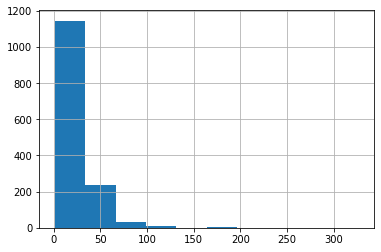

In [22]:
users_data[users_data.passed_corse].day.hist()

In [23]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


##### заведем данные когда было первое действие юзера

In [75]:
user_min_time = events_data.groupby('user_id', as_index=False)\
                .agg({'timestamp':'min'})\
                .rename({'timestamp':'min_timestamp'},axis=1)
user_min_time

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660
...,...,...
19229,26790,1451484016
19230,26793,1510225031
19231,26794,1495287049
19232,26797,1508425316


#### добавим колонку в датафрейм

In [76]:
users_data = users_data.merge(user_min_time, how='outer')

In [32]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660


# отберем данные из events_data

## 1 способ( не совсем верный)

In [77]:
events_data_tain = pd.DataFrame()

In [78]:
for user_id in users_data.user_id:
    min_user_time = users_data[users_data.user_id == user_id].min_timestamp.item()

In [79]:
min_user_time

1520975763

In [36]:
for user_id in users_data.user_id:
    min_user_time = users_data[users_data.user_id == user_id].min_timestamp.item()
    time_threshold = min_user_time + 3*24*60*60
    
    user_events_data = events_data[(events_data.user_id == user_id) & (events_data.timestamp < time_threshold)]
    break

In [37]:
user_events_data

,step_id,timestamp,action,user_id,date,day
1347416,31981,1472827464,viewed,1,2016-09-02 14:44:24,2016-09-02
1347417,31981,1472827464,discovered,1,2016-09-02 14:44:24,2016-09-02


In [ ]:
# ТАК ДЕЛАТЬ НЕ НАДО / ОЧЕНЬ ДОЛГО
# for user_id in users_data.user_id:
#     min_user_time = users_data[users_data.user_id == user_id].min_timestamp.item()
#     time_threshold = min_user_time + 3*24*60*60
    
#     user_events_data = events_data[(events_data.user_id == user_id) & (events_data.timestamp < time_threshold)]
#     user_events_data = user_events_data.append(user_events_data)

In [ ]:
# ЧУЖОЕ РЕШЕНИЕ
# %%time
# events_data_train = events_data.merge(users_data[['user_id', 'min_timestamp']])
# time_timestamp = events_data_train.timestamp - events_data_train.min_timestamp
# events_data_train = events_data_train[time_timestamp <= 3*24*60*60].drop(['min_timestamp'], axis = 1)

##### надо отборать только те события которые вписываются в промежуток  первые 3 дня с начала прохождения курсов

###### создадим новую колонку

In [81]:
events_data['user_time'] = events_data.user_id.map(str) + '_' + events_data.timestamp.map(str)

In [82]:
events_data

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
...,...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19,11677_1526772685
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750


In [83]:
# создадим переменную 3 дня
learning_time_threshold = 3*24*60*60
learning_time_threshold

259200

In [ ]:
создадим еще одну связку

In [84]:
user_min_time.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [85]:
user_learning_time_threshold = user_min_time.user_id.map(str) + '_' +\
                (user_min_time.min_timestamp + learning_time_threshold).map(str)

In [45]:
user_learning_time_threshold

0            1_1473086664
1            2_1514642564
2            3_1434617676
3            5_1466416009
4            7_1521893860
               ...       
19229    26790_1451743216
19230    26793_1510484231
19231    26794_1495546249
19232    26797_1508684516
19233    26798_1521234963
Length: 19234, dtype: object

In [86]:
user_min_time['user_learning_time_threshold'] = user_learning_time_threshold

In [47]:
user_min_time.head()

,user_id,min_timestamp,user_learning_time_threshold
0,1,1472827464,1_1473086664
1,2,1514383364,2_1514642564
2,3,1434358476,3_1434617676
3,5,1466156809,5_1466416009
4,7,1521634660,7_1521893860


### соеденим

In [87]:
events_data = events_data.merge(user_min_time[['user_id','user_learning_time_threshold']], how='outer')

In [50]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


###### сравним строки

In [88]:
events_data_train = events_data[events_data.user_time <= events_data.user_learning_time_threshold]

In [54]:
events_data_train

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
...,...,...,...,...,...,...,...,...
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_1527021864
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_1527021864
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_1527031950
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_1527031950


# вопрос

##### В процессе решения одной аналитической задачи очень часто замечаешь и другие задачи, связанные с исследуемым вопросом. В свое время, работая над предсказанием оттока студентов со stepik, я многое изменил в структуре своих курсов. 

Тогда я нашел довольно интересную закономерность прохождения онлайн курсов. Слушатели онлайн курсов очень негативно реагируют на невозможность решить задачу, иными словами, если студент застрял на определенном шаге, то он, с высокой вероятность, вообще бросит курс, чем просто пропустит этот шаг и продолжит обучение. 

Давайте найдем такой стэп, используя данные о сабмитах. Для каждого пользователя найдите такой шаг, который он не смог решить, и после этого не пытался решать другие шаги. Затем найдите id шага,  который стал финальной точкой практического обучения на курсе для максимального числа пользователей. 

То есть мы исследуем следующий сценарий: человек решает стэп, не может получить правильный ответ и больше не возвращается к практическим задачам. Что это за шаг такой, который отпугнул максимальное число пользователей?

In [55]:
submission_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [74]:
submission_data.query('submission_status == "wrong"').groupby('step_id').count()

,timestamp,submission_status,user_id,date,day
step_id,,,,,
31971,6893,6893,6893,6893,6893
31972,8960,8960,8960,8960,8960
31976,5937,5937,5937,5937,5937
31977,6457,6457,6457,6457,6457
31978,16084,16084,16084,16084,16084
...,...,...,...,...,...
33992,2037,2037,2037,2037,2037
33994,2220,2220,2220,2220,2220
33998,859,859,859,859,859


In [72]:
submission_data.query('submission_status == "wrong"').groupby('step_id').count().idxmax()

timestamp            31978
submission_status    31978
user_id              31978
date                 31978
day                  31978
dtype: int64

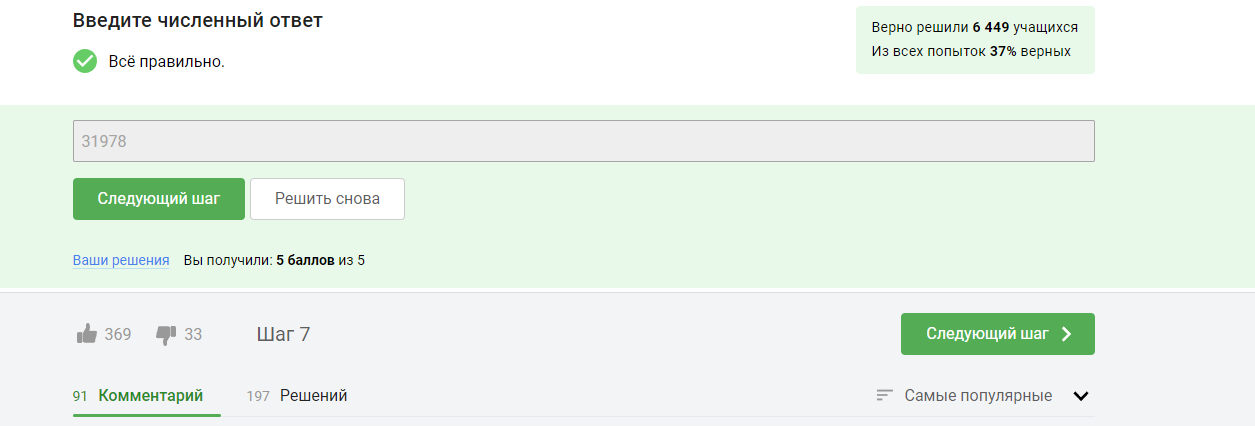

In [73]:
submission_data.query('submission_status == "wrong"').groupby('step_id').count().sort_values('user_id', ascending=False)

,timestamp,submission_status,user_id,date,day
step_id,,,,,
31978,16084,16084,16084,16084,16084
32031,13373,13373,13373,13373,13373
32202,13002,13002,13002,13002,13002
33481,10300,10300,10300,10300,10300
32075,10003,10003,10003,10003,10003
...,...,...,...,...,...
33482,707,707,707,707,707
33681,703,703,703,703,703
33362,673,673,673,673,673


## Решение карпова

In [76]:
# submissions_data = pd.read_csv('submissions_data_train.csv')
submissions_data  = submission_data
submissions_data_by_step = submissions_data \
    .pivot_table(values='timestamp', index=['user_id', 'step_id'], aggfunc = 'max', 
                 columns='submission_status', fill_value=0) \
    .reset_index()

submissions_data_by_step['is_solved'] = submissions_data_by_step.correct > 0

users_max_time = submissions_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'max'}) \
    .rename(columns={'timestamp': 'last_timestamp'})


not_solved_steps = submissions_data_by_step[submissions_data_by_step.is_solved == False]

not_solved_steps = not_solved_steps.merge(users_max_time, on='user_id')

not_solved_steps['is_last_action'] = not_solved_steps.wrong == not_solved_steps.last_timestamp

not_solved_steps_last_action = not_solved_steps[not_solved_steps.is_last_action == True]

not_solved_steps_last_action.groupby('step_id', as_index=False) \
    .agg({'user_id': 'count'}).sort_values('user_id', ascending=False).head()

,step_id,user_id
4,31978,151
28,32812,130
11,32031,95
19,32202,88
42,33481,78


## Чужое
Вариант №2.

Основывается на поиске Степа, после которого дропнулось максимальное количество учеников.

In [77]:
# Ищем максимальное время у ученика в правильных и неправильных ответах.
X = submissions_data.groupby(['user_id', 'submission_status'], as_index=False)\
                .agg({'timestamp': 'max'})

# Выведем время правильных и неправильных ответов в отдельные колонки
X = X.pivot_table(index='user_id',
                columns='submission_status',
                values='timestamp',
                fill_value=0)\
                .reset_index()

# Получим список учеников (user_id), у которых все закончилось после неправильных ответов
# Это и есть дропнувшиеся ученики
X = X[X['wrong'] > X['correct']]['user_id']

# Найдем Степ, после которого дропнулось максимальное количество учеников
submissions_data[(submissions_data['user_id'].isin(X)) & (submissions_data['submission_status'] == 'wrong')]\
                                            .groupby(['step_id'], as_index=False)\
                                            .agg({'user_id': 'count'})\
                                            .sort_values(by='user_id', ascending=False)\
                                            .iloc[0,0]


31978

# продолжаем лекцию

###### проверим кто в итоге остался у нас в данных

In [89]:
events_data_train.groupby('user_id').day.nunique().max()

4

##### проведем тот же отбор с другим датафреймом

In [90]:
submissions_data  = submission_data

In [16]:
submissions_data['users_time'] = submissions_data.user_id.map(str) + '_' + submissions_data.timestamp.map(str)
submissions_data = submissions_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')
submissions_data_train = submissions_data[submissions_data.users_time <= submissions_data.user_learning_time_threshold]
submissions_data_train.groupby('user_id').day.nunique().max()

4

##### начнем обучение

In [91]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index()
# X=X.rename(columns={'day':'days'}) СРАЗУ НЕ СДЕЛАЛИ потом пришлось переименовать

In [18]:

X

,user_id,day
0,2,1
1,3,1
2,8,1
3,14,1
4,16,3
...,...,...
8908,26787,1
8909,26790,1
8910,26794,3
8911,26797,1


In [19]:
submissions_data_train.head()

,step_id,timestamp,submission_status,user_id,date,day,users_time,user_learning_time_threshold
0,31971.0,1.434349e+09,correct,15853,2015-06-15 06:21:15,2015-06-15,15853_1434349275,15853_1434605177
1,31972.0,1.434348e+09,correct,15853,2015-06-15 06:05:00,2015-06-15,15853_1434348300,15853_1434605177
4,31976.0,1.434348e+09,wrong,15853,2015-06-15 06:02:03,2015-06-15,15853_1434348123,15853_1434605177
5,31976.0,1.434348e+09,correct,15853,2015-06-15 06:03:08,2015-06-15,15853_1434348188,15853_1434605177
7,31977.0,1.434347e+09,correct,15853,2015-06-15 05:49:31,2015-06-15,15853_1434347371,15853_1434605177


###### сколько степов человек попытался решить за первые 3 дня?

In [92]:
steps_tried=submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index()\
        .rename({'step_id':'steps_tried'})

In [21]:
steps_tried

,user_id,step_id
0,2,2
1,3,4
2,8,11
3,14,1
4,16,23
...,...,...
8908,26787,3
8909,26790,1
8910,26794,27
8911,26797,2


In [93]:
# наращиваем наш датафрейм X данными
X = X.merge(steps_tried, on='user_id', how='outer')

In [23]:
X

,user_id,day,step_id
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23
...,...,...,...
8908,26787,1,3
8909,26790,1,1
8910,26794,3,27
8911,26797,1,2


In [94]:
# наведем немного порядок) сразу не пеереименовали
X=X.rename(columns={'day':'days'})

In [28]:
X.head()

,user_id,days,step_id
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23


In [95]:
submissions_data_train

,step_id,timestamp,submission_status,user_id,date,day,users_time,user_learning_time_threshold
0,31971.0,1.434349e+09,correct,15853,2015-06-15 06:21:15,2015-06-15,15853_1434349275,15853_1434605177
1,31972.0,1.434348e+09,correct,15853,2015-06-15 06:05:00,2015-06-15,15853_1434348300,15853_1434605177
4,31976.0,1.434348e+09,wrong,15853,2015-06-15 06:02:03,2015-06-15,15853_1434348123,15853_1434605177
5,31976.0,1.434348e+09,correct,15853,2015-06-15 06:03:08,2015-06-15,15853_1434348188,15853_1434605177
7,31977.0,1.434347e+09,correct,15853,2015-06-15 05:49:31,2015-06-15,15853_1434347371,15853_1434605177
...,...,...,...,...,...,...,...,...
509099,120745.0,1.501947e+09,wrong,2615,2017-08-05 15:29:19,2017-08-05,2615_1501946959,2615_1502205860
509100,120745.0,1.503060e+09,correct,13177,2017-08-18 12:38:47,2017-08-18,13177_1503059927,13177_1503314487
509101,120745.0,1.506348e+09,wrong,15253,2017-09-25 14:02:33,2017-09-25,15253_1506348153,15253_1506606463
509102,120745.0,1.523035e+09,wrong,1424,2018-04-06 17:21:56,2018-04-06,1424_1523035316,1424_1523294469


In [96]:
submissions_data_train.pivot_table(index='user_id',
                        columns='submission_status',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index().head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,4,4
2,8,9,21
3,14,0,1
4,16,23,27


###### Добавим эти данные о количестве правильных и не правильных ответов

In [97]:
X = X.merge(submissions_data_train.pivot_table(index='user_id',
                        columns='submission_status',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index())

In [98]:
X.head()

,user_id,days,step_id,correct,wrong
0,2,1,2,2,0
1,3,1,4,4,4
2,8,1,11,9,21
3,14,1,1,0,1
4,16,3,23,23,27


## Добавим новую колонку коэффициент ответов

In [99]:
X['correct_ratio'] = X.correct/(X.correct + X.wrong)

In [44]:
X.head()

,user_id,days,step_id,correct,wrong,correct_ratio
0,2,1,2,2,0,1.00
1,3,1,4,4,4,0.50
2,8,1,11,9,21,0.30
3,14,1,1,0,1,0.00
4,16,3,23,23,27,0.46


##### из данных events отберем сколько у нас было просмотров сумарно

In [45]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


In [100]:
events_data_train.pivot_table(index = 'user_id',
                        columns = 'action',
                        values  = 'step_id',
                        aggfunc = 'count',
                        fill_value = 0).reset_index()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,9
2,3,15,15,4,20
3,5,1,1,0,1
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,6,6,1,6
19230,26793,1,0,1,1
19231,26794,61,61,32,134
19232,26797,10,10,2,10


In [101]:
# возьмем только нужную колонку
X = X.merge(events_data_train.pivot_table(index = 'user_id',
                        columns = 'action',
                        values  = 'step_id',
                        aggfunc = 'count',
                        fill_value = 0).reset_index()[['user_id','viewed']], how = 'outer')

In [102]:
X.head()

,user_id,days,step_id,correct,wrong,correct_ratio,viewed
0,2,1.0,2.0,2.0,0.0,1.00,9
1,3,1.0,4.0,4.0,4.0,0.50,20
2,8,1.0,11.0,9.0,21.0,0.30,154
3,14,1.0,1.0,0.0,1.0,0.00,9
4,16,3.0,23.0,23.0,27.0,0.46,132


In [103]:
# заполним пропуски
X=X.fillna(0)

#### расширим немного данные( потом удалим лишнее)

In [62]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660


In [104]:
X = X.merge(users_data[['user_id','passed_corse','is_gone_user']], how='outer')

In [54]:
X.head()

,user_id,days,step_id,correct,wrong,correct_ratio,viewed,passed_corse,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.00,10,False,True
1,3,1.0,4.0,4.0,4.0,0.50,192,False,True
2,8,1.0,11.0,9.0,21.0,0.30,156,False,True
3,14,1.0,1.0,0.0,1.0,0.00,9,False,True
4,16,3.0,23.0,23.0,27.0,0.46,651,True,True


## Выкинем тех кто еще не закончил и не бросил

In [105]:
# ~ это отрицание
X=X[~((X.is_gone_user == False) & (X.passed_corse == False))]

In [106]:
X.head()

,user_id,days,step_id,correct,wrong,correct_ratio,viewed,passed_corse,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.00,9,False,True
1,3,1.0,4.0,4.0,4.0,0.50,20,False,True
2,8,1.0,11.0,9.0,21.0,0.30,154,False,True
3,14,1.0,1.0,0.0,1.0,0.00,9,False,True
4,16,3.0,23.0,23.0,27.0,0.46,132,True,True


In [107]:
# Проверяем
X.groupby(['passed_corse','is_gone_user']).user_id.count()

passed_corse  is_gone_user
False         True            16560
True          False             141
              True             1284
Name: user_id, dtype: int64

все кто не прошли 16560


In [118]:
y = X.passed_corse #.map(int)

AttributeError: 'DataFrame' object has no attribute 'passed_corse'

In [109]:
X = X.drop(['passed_corse','is_gone_user'], axis = 1)

In [116]:
X.head()

,user_id,days,step_id,correct,wrong,correct_ratio,viewed
user_id,,,,,,,
2,2,1.0,2.0,2.0,0.0,1.00,9
3,3,1.0,4.0,4.0,4.0,0.50,20
8,8,1.0,11.0,9.0,21.0,0.30,154
14,14,1.0,1.0,0.0,1.0,0.00,9
16,16,3.0,23.0,23.0,27.0,0.46,132


#### user_id для обучения нам не нужен  но и удалять сразу не стоит - перенескм в индексы

In [114]:
X = X.set_index(X.user_id).head()

In [117]:
X = X.drop('user_id', axis = 1)
X.head()

,days,step_id,correct,wrong,correct_ratio,viewed
user_id,,,,,,
2,1.0,2.0,2.0,0.0,1.00,9
3,1.0,4.0,4.0,4.0,0.50,20
8,1.0,11.0,9.0,21.0,0.30,154
14,1.0,1.0,0.0,1.0,0.00,9
16,3.0,23.0,23.0,27.0,0.46,132


In [120]:
y=y.map(int)
y

0        0
1        0
2        0
3        0
4        1
        ..
19229    0
19230    1
19231    0
19232    0
19233    0
Name: passed_corse, Length: 17985, dtype: int64